**Decision Tree**

In [38]:
import numpy as np
import pandas as pd


In [39]:
df = pd.read_csv("data_dec.csv")

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


In [41]:
df['outlook']= label_encoder.fit_transform(df['outlook'])
df['temp']= label_encoder.fit_transform(df['temp'])
df['humidity']= label_encoder.fit_transform(df['humidity'])
df['wind']= label_encoder.fit_transform(df['wind'])
df['playTennis']= label_encoder.fit_transform(df['playTennis'])

In [42]:
model =DecisionTreeClassifier(criterion='entropy')

In [43]:
df

,Day,outlook,temp,humidity,wind,playTennis
0,1,2,1,0,1,0
1,2,2,1,0,0,0
2,3,0,1,0,1,1
3,4,1,2,0,1,1
4,5,1,0,1,1,1
5,6,1,0,1,0,0
6,7,0,0,1,0,1
7,8,2,2,0,1,0
8,9,2,0,1,1,1
9,10,1,2,1,1,1


In [44]:
df=df.reset_index(drop=True)

In [45]:
x=df.drop(columns=['Day','playTennis'])

y=df['playTennis']


In [46]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [47]:
model.predict([[2,1,0,1]])
model.predict([[0,1,1,1]])
model.predict([[1,0,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

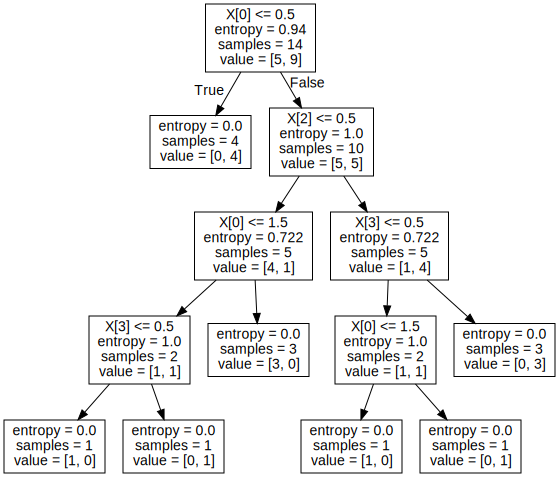

In [48]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None)        
                                  
graph = graphviz.Source(dot_data)  
graph 

**KNN**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [54]:
neigh.fit(x, y)

KNeighborsClassifier(n_neighbors=2)

In [55]:
neigh.predict([[1,0,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [56]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [58]:
clf.fit(x, y)

GaussianNB()

In [59]:
clf.predict([[1,0,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y,clf.predict(x))

0.9285714285714286

In [61]:
accuracy_score(y,model.predict(x))

1.0

In [62]:
accuracy_score(y,neigh.predict(x))

0.6428571428571429

In [75]:
result=[]
input = []
for i in range(14):
  i = i+1
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x, y)
  results = accuracy_score(y,neigh.predict(x))
  input.append(i)
  result.append(results)
  


In [76]:
result

[1.0,
 0.6428571428571429,
 0.7857142857142857,
 0.7142857142857143,
 0.7857142857142857,
 0.7142857142857143,
 0.7142857142857143,
 0.8571428571428571,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429]

In [77]:
input

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

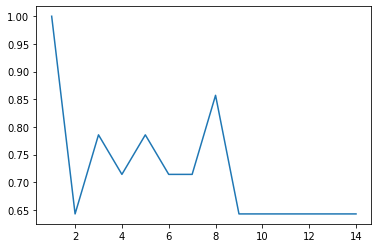

In [78]:
import matplotlib.pyplot as plt
plt.plot(input,result)